<a href="https://colab.research.google.com/github/Viji123-ops/The-git--folder/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK 1 -> Data Acquisition

#Read the dataset into a DataFrame.

import pandas as pd

# Load the dataset
df = pd.read_csv("Loan_Default_Prediction1.csv")  # Replace with your file path if needed


In [ ]:
# Display missing values in each column
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
PaymentStatus     0
Income Level      0
Gender            0
dtype: int64


In [ ]:
# Fill missing values appropriately (numerical → median, categorical → mode).


# Fill numeric columns with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].median())
df['DTIRatio'] = df['DTIRatio'].fillna(df['DTIRatio'].median())

# Fill categorical columns with most frequent value (mode)
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['EmploymentType'] = df['EmploymentType'].fillna(df['EmploymentType'].mode()[0])
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df['PaymentStatus'] = df['PaymentStatus'].fillna(df['PaymentStatus'].mode()[0])


In [ ]:
#Convert text to lowercase and remove unwanted spaces for consistency.

df['Education'] = df['Education'].str.lower().str.strip()
df['EmploymentType'] = df['EmploymentType'].str.lower().str.strip()
df['MaritalStatus'] = df['MaritalStatus'].str.lower().str.strip()
df['LoanPurpose'] = df['LoanPurpose'].str.lower().str.strip()
df['PaymentStatus'] = df['PaymentStatus'].str.lower().str.strip()


In [ ]:
#Transform 'yes' → 1 and 'no' → 0 for modeling.

binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [ ]:
#Convert string-type categorical columns to category type to save memory and improve performance.

cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'PaymentStatus']
for col in cat_cols:
    df[col] = df[col].astype('category')


In [ ]:
#Convert string-type categorical columns to category type to save memory and improve performance.
# Final structure check
print("\n✅ Final dataset info:")
print(df.info())



✅ Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  object  
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     0 non-null       float64 
 14  HasDependents   0 non-null       float64 
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner    

In [ ]:
#TASK 2 -> Exploratory Data Analysis (EDA)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Better styling
sns.set(style="whitegrid")

#Structure and Summary

print(df.head())        # View first few rows
print(df.shape)         # Rows and columns
print(df.info())        # Data types and nulls
print(df.describe())    # Summary stats for numeric columns



       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... EmploymentType  \
0               4         15.23        36      0.44  ...      full-time   
1               1          4.81        60      0.68  ...      full-time   
2               3         21.17        24      0.31  ...     unemployed   
3               3          7.07        24      0.23  ...      full-time   
4               4          6.51        48      0.73  ...     unemployed   

  MaritalStatus HasMortgage  HasDependents  LoanPurpose HasCoSigner  Default  \
0      divorced         NaN            NaN

In [ ]:
#Checking for missing values

print(df.isnull().sum())


LoanID                 0
Age                    0
Income                 0
LoanAmount             0
CreditScore            0
MonthsEmployed         0
NumCreditLines         0
InterestRate           0
LoanTerm               0
DTIRatio               0
Education              0
EmploymentType         0
MaritalStatus          0
HasMortgage       255347
HasDependents     255347
LoanPurpose            0
HasCoSigner       255347
Default                0
PaymentStatus          0
Income Level           0
Gender                 0
dtype: int64


In [ ]:
# Convert 'yes' → 1, 'no' → 0 for binary columns
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

for col in binary_cols:

    df[col] = df[col].map({'yes': 1, 'no': 0})       # Convert to binary


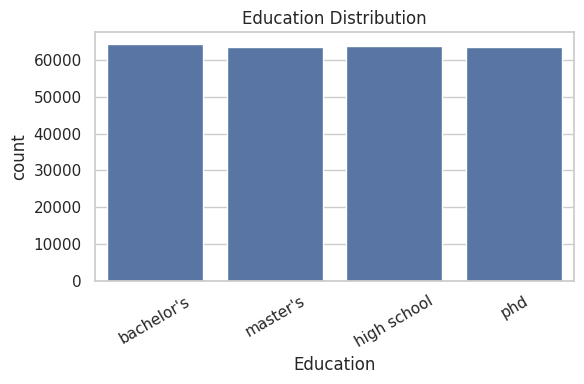

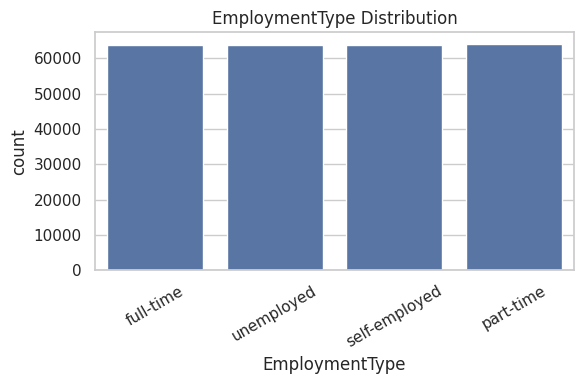

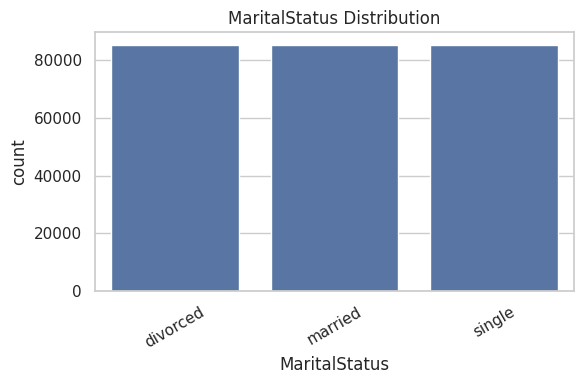

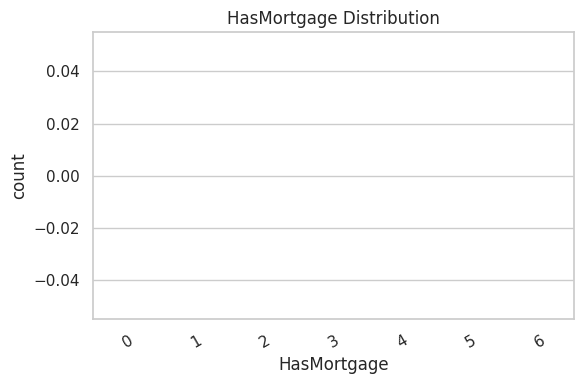

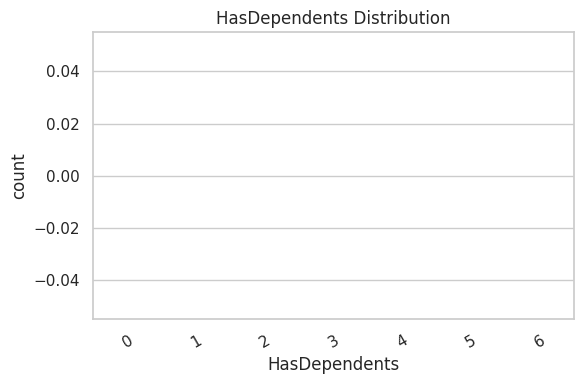

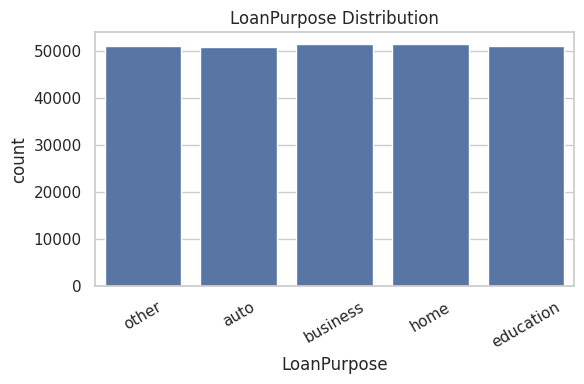

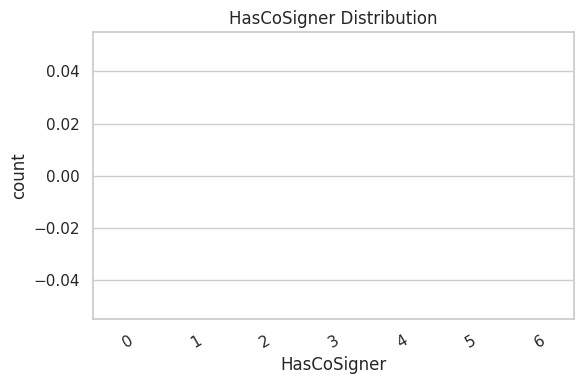

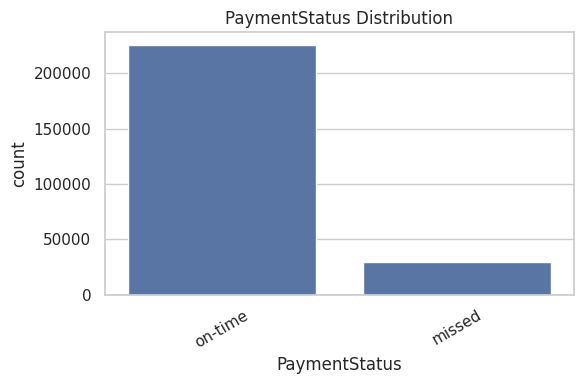

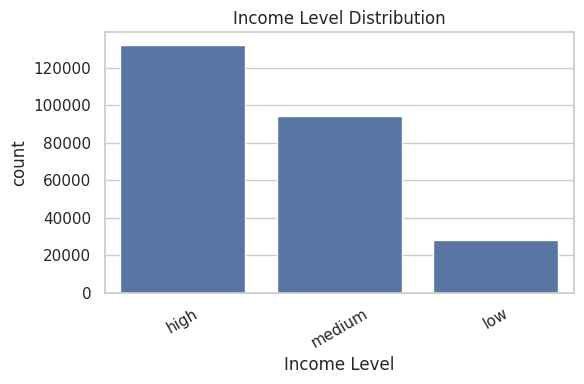

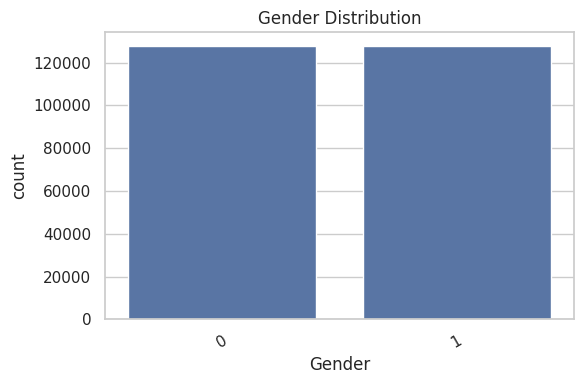

In [ ]:
#Categorical Columns

# Bar plots
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
            'HasDependents', 'LoanPurpose', 'HasCoSigner', 'PaymentStatus',
            'Income Level', 'Gender']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


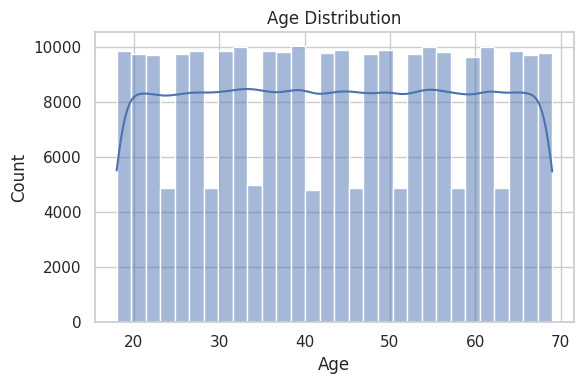

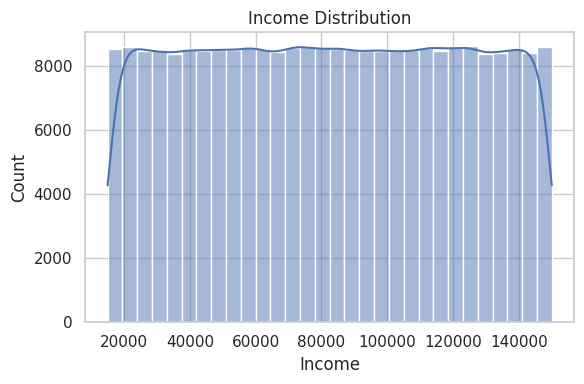

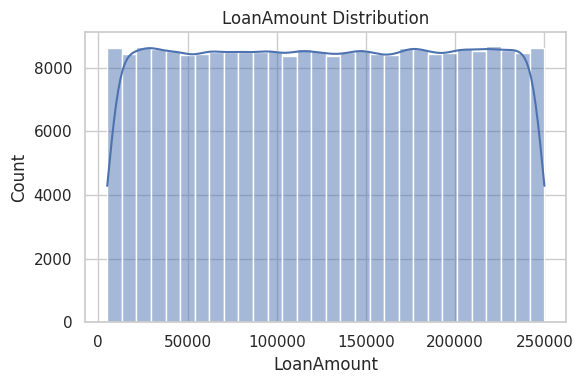

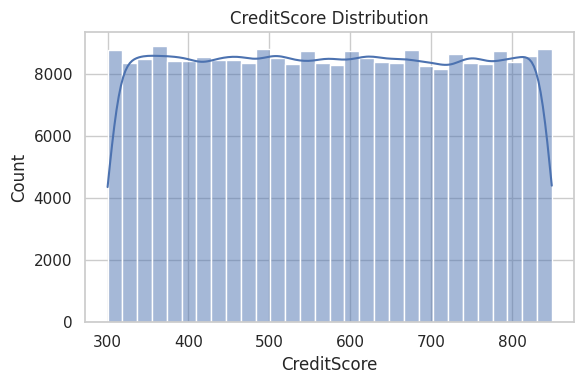

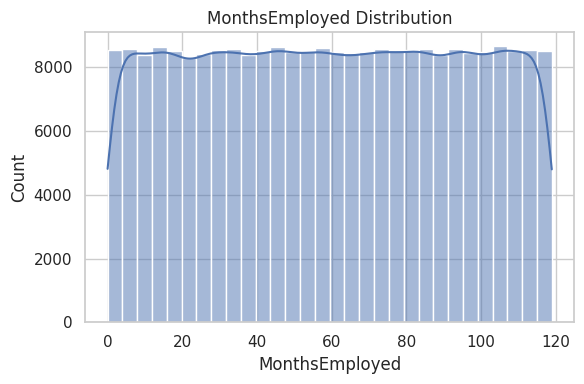

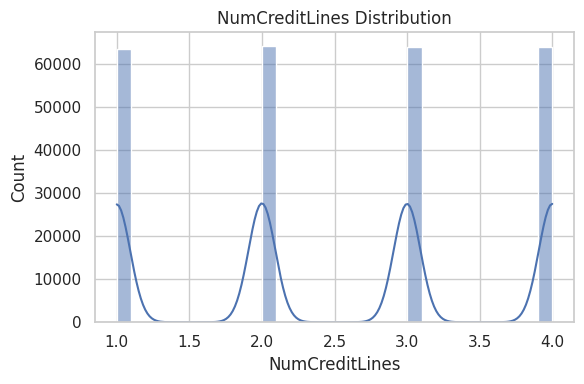

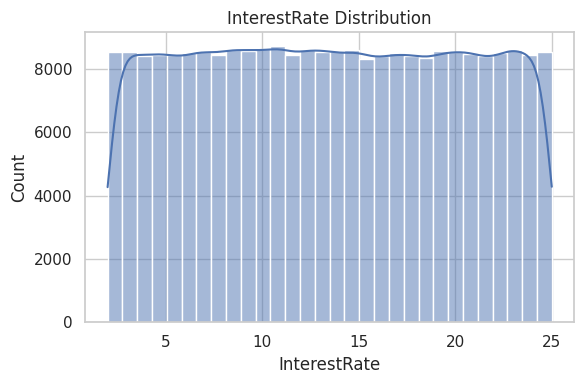

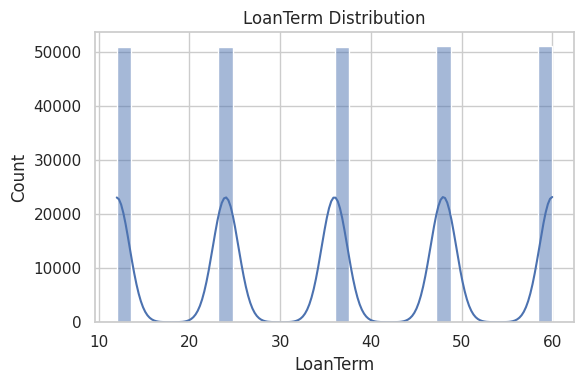

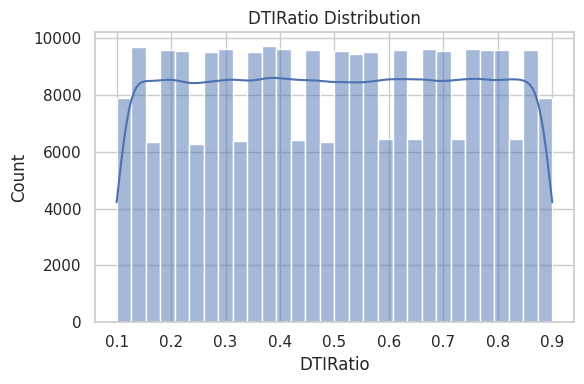

In [ ]:
#Numeric columns

num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()


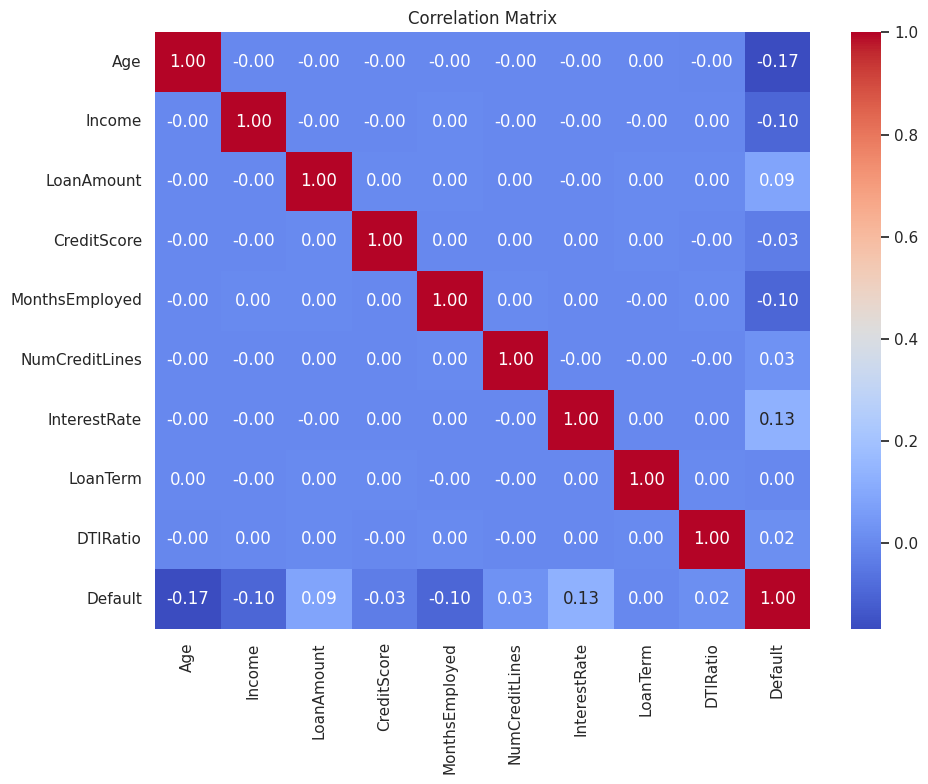

In [ ]:
#Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols + ['Default']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


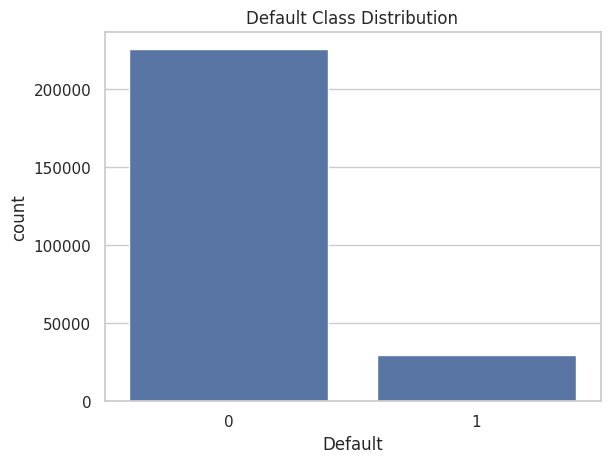

In [ ]:
#Class Imbalance Check

sns.countplot(x='Default', data=df)
plt.title("Default Class Distribution")
plt.show()


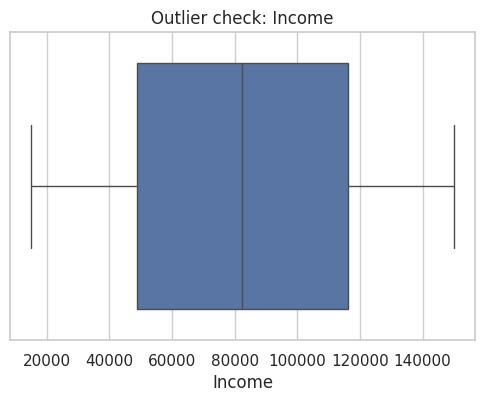

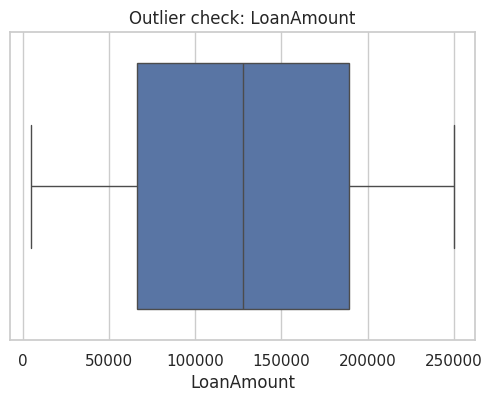

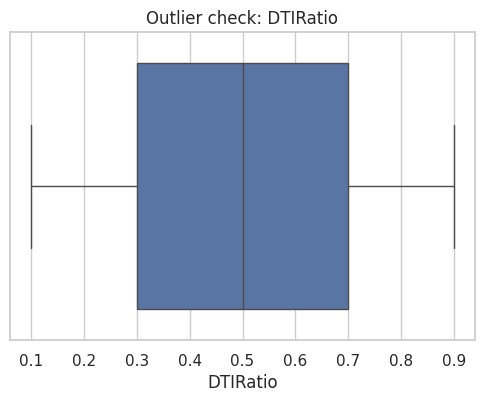

In [ ]:
#Outlier Detection

for col in ['Income', 'LoanAmount', 'DTIRatio']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.show()


In [ ]:
#TASK 3 ----> FEATURE ENGINEERING

#credit history length

# Assuming first job/credit starts at 18
df['Credit_History_Length'] = df['Age'] - (df['MonthsEmployed'] / 12)
df['Credit_History_Length'] = df['Credit_History_Length'].clip(lower=0)  # no negative age


In [ ]:
df['LatePaymentFlag'] = df['PaymentStatus'].apply(lambda x: 1 if 'late' in x.lower() else 0)


In [ ]:
#Binning

#Income Level Binning

def income_group(income):
    if income < 30000:
        return 'Low'
    elif income < 80000:
        return 'Medium'
    else:
        return 'High'

df['Income_Level_Bin'] = df['Income'].apply(income_group)

#Credit Score Binning

def credit_score_category(score):
    if score >= 750:
        return 'Excellent'
    elif score >= 650:
        return 'Good'
    elif score >= 550:
        return 'Fair'
    else:
        return 'Poor'

df['CreditCategory'] = df['CreditScore'].apply(credit_score_category)



In [ ]:
#Encoding the variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0 (if binary)


df = pd.get_dummies(df, columns=[
    'Education', 'EmploymentType', 'MaritalStatus',
    'LoanPurpose', 'Income_Level_Bin', 'CreditCategory'
])


In [ ]:
#Final Check

print(df.head())
print(df.columns)  # See all new features


       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  \
0               4         15.23        36      0.44  ...   
1               1          4.81        60      0.68  ...   
2               3         21.17        24      0.31  ...   
3               3          7.07        24      0.23  ...   
4               4          6.51        48      0.73  ...   

   LoanPurpose_education  LoanPurpose_home  LoanPurpose_other  \
0                  False             False               True   
1                  False             False               True   
2                

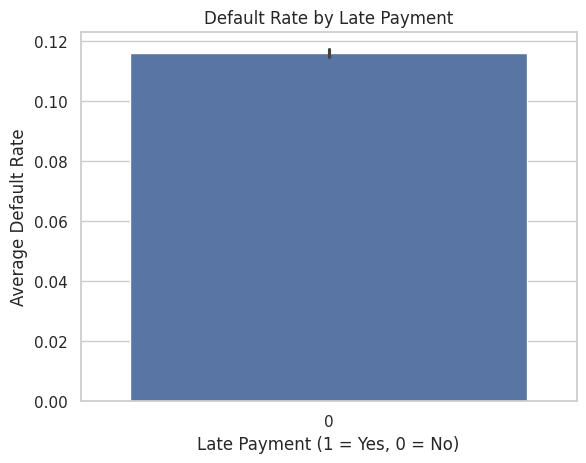

In [ ]:
#Visualization for feature engineering

#Late Payment Impact on Default
sns.barplot(x='LatePaymentFlag', y='Default', data=df)
plt.title("Default Rate by Late Payment")
plt.xlabel("Late Payment (1 = Yes, 0 = No)")
plt.ylabel("Average Default Rate")
plt.show()

#Shows how late payments affect default likelihood.


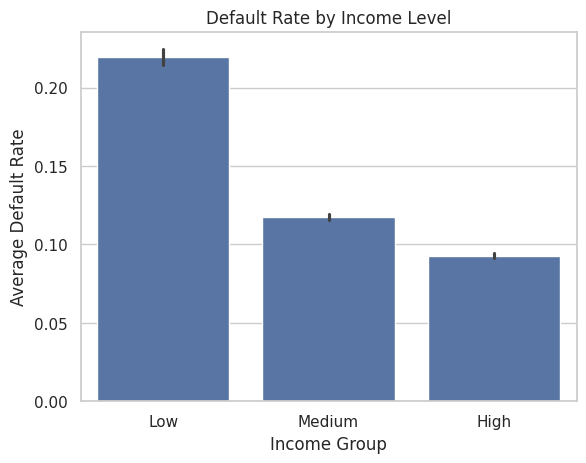

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default',
       'PaymentStatus', 'Income Level', 'Gender', 'Credit_History_Length',
       'LatePaymentFlag', 'Education_bachelor's', 'Education_high school',
       'Education_master's', 'Education_phd', 'EmploymentType_full-time',
       'EmploymentType_part-time', 'EmploymentType_self-employed',
       'EmploymentType_unemployed', 'MaritalStatus_divorced',
       'MaritalStatus_married', 'MaritalStatus_single', 'LoanPurpose_auto',
       'LoanPurpose_business', 'LoanPurpose_education', 'LoanPurpose_home',
       'LoanPurpose_other', 'Income_Level_Bin_High', 'Income_Level_Bin_Low',
       'Income_Level_Bin_Medium', 'CreditCategory_Excellent',
       'CreditCategory_Fair', 'CreditCategory_Good', 'CreditCategory_Poor',
       'Income_Level_Bin'],
      dtype='object')


In [ ]:
#Income Level vs Default
def income_group(income):
    if income < 30000:
        return 'Low'
    elif income < 80000:
        return 'Medium'
    else:
        return 'High'

df['Income_Level_Bin'] = df['Income'].apply(income_group)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Income_Level_Bin', y='Default', data=df, order=['Low', 'Medium', 'High'])
plt.title("Default Rate by Income Level")
plt.xlabel("Income Group")
plt.ylabel("Average Default Rate")
plt.show()
print(df.columns)  # Check if 'Income_Level_Bin' is in the list



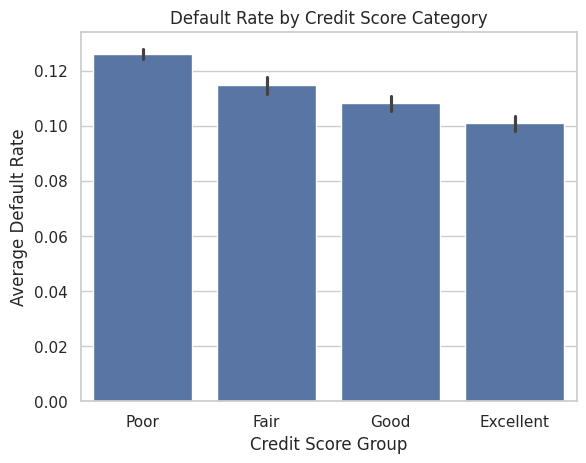

   CreditScore CreditCategory
0          520           Poor
1          458           Poor
2          451           Poor
3          743           Good
4          633           Fair


In [ ]:
#Credit Category vs Default

def credit_score_category(score):
    if score >= 750:
        return 'Excellent'
    elif score >= 650:
        return 'Good'
    elif score >= 550:
        return 'Fair'
    else:
        return 'Poor'

df['CreditCategory'] = df['CreditScore'].apply(credit_score_category)

sns.barplot(x='CreditCategory', y='Default', data=df,
            order=['Poor', 'Fair', 'Good', 'Excellent'])
plt.title("Default Rate by Credit Score Category")
plt.xlabel("Credit Score Group")
plt.ylabel("Average Default Rate")
plt.show()

print(df[['CreditScore', 'CreditCategory']].head())


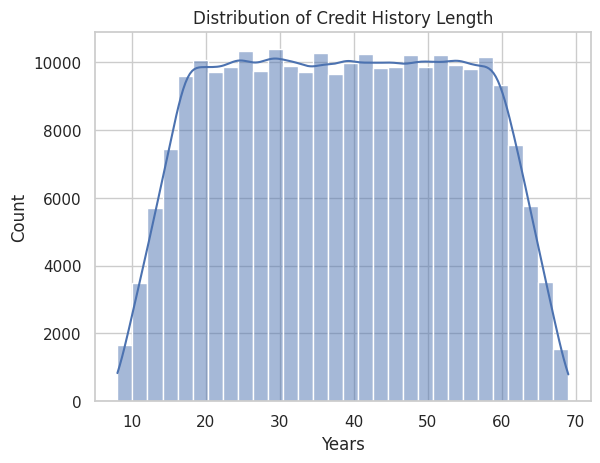

In [ ]:
# Distribution of Credit History Length
sns.histplot(df['Credit_History_Length'], kde=True, bins=30)
plt.title("Distribution of Credit History Length")
plt.xlabel("Years")
plt.show()


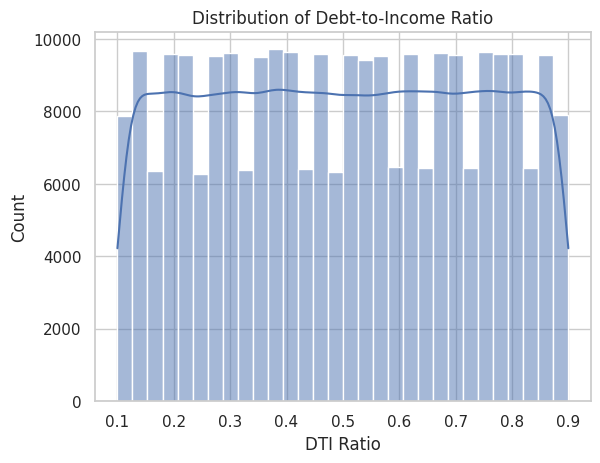

In [ ]:
#Distribution of DTIRatio (Debt-to-Income)
sns.histplot(df['DTIRatio'], kde=True, bins=30)
plt.title("Distribution of Debt-to-Income Ratio")
plt.xlabel("DTI Ratio")
plt.show()


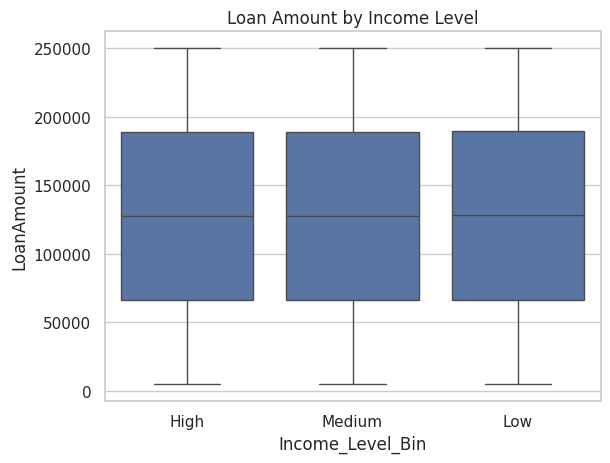

In [ ]:
#Boxplot of LoanAmount by Income Level
sns.boxplot(x='Income_Level_Bin', y='LoanAmount', data=df)
plt.title("Loan Amount by Income Level")
plt.show()


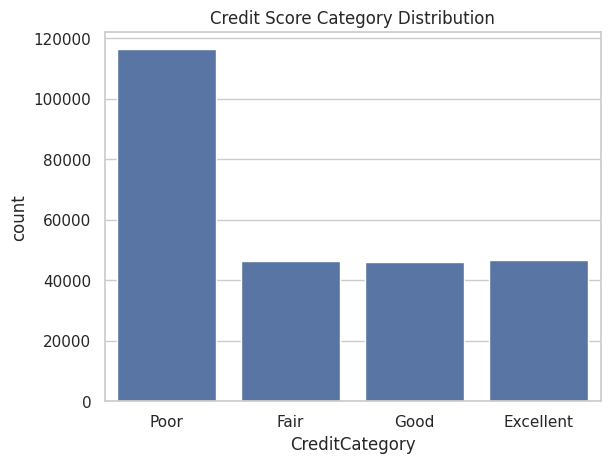

In [ ]:
#Countplot of Credit Categories
sns.countplot(x='CreditCategory', data=df,
              order=['Poor', 'Fair', 'Good', 'Excellent'])
plt.title("Credit Score Category Distribution")
plt.show()


In [ ]:
plt.savefig("chart_name.png")


<Figure size 640x480 with 0 Axes>

In [ ]:
#TASK 4 ---->  Predictive Modeling

from sklearn.model_selection import train_test_split

X = df.drop('Default', axis=1)
y = df['Default']

# Split while maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
#Handle Class Imbalance
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)


🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45139
           1       1.00      1.00      1.00      5931

    accuracy                           1.00     51070
   macro avg       1.00      1.00      1.00     51070
weighted avg       1.00      1.00      1.00     51070

📊 Confusion Matrix:
 [[45139     0]
 [    0  5931]]
🎯 ROC-AUC Score: 1.0


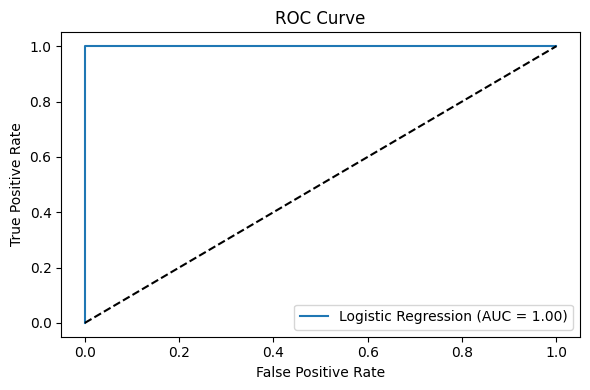

In [ ]:
#Logistic Regression


# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load dataset
df = pd.read_csv('Loan_Default_Prediction1.csv')  # Make sure the file is uploaded in Colab or working directory

# STEP 3: Drop ID columns (if any)
if 'LoanID' in df.columns:
    df.drop(['LoanID'], axis=1, inplace=True)

# STEP 4: Handle missing values safely (NO inplace)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# STEP 5: Convert object columns to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# STEP 6: One-hot encode categorical columns
X = df.drop('Default', axis=1)
X = pd.get_dummies(X, drop_first=True)

# STEP 7: Target column
y = df['Default']

# STEP 8: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 9: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 10: Train logistic regression model
model = LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train, y_train)

# STEP 11: Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# STEP 12: Evaluation
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🎯 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# STEP 13: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45139
           1       1.00      1.00      1.00      5931

    accuracy                           1.00     51070
   macro avg       1.00      1.00      1.00     51070
weighted avg       1.00      1.00      1.00     51070

📊 Confusion Matrix:
 [[45139     0]
 [    0  5931]]
🎯 ROC-AUC Score: 1.0


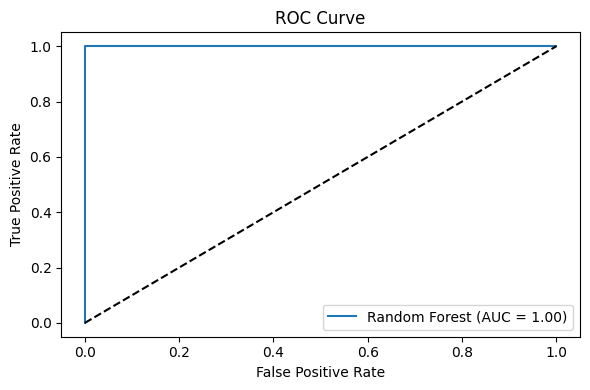

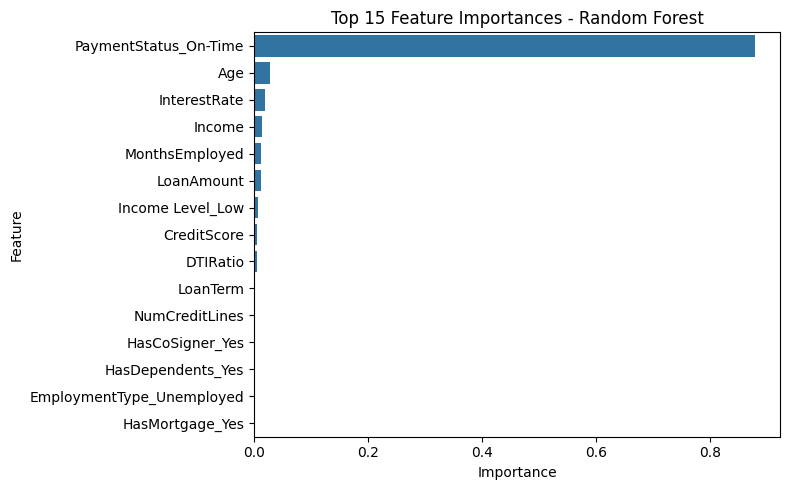

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load dataset
df = pd.read_csv('Loan_Default_Prediction1.csv')  # Make sure the file is uploaded in Colab or working directory

# STEP 3: Drop ID columns (if any)
if 'LoanID' in df.columns:
    df.drop(['LoanID'], axis=1, inplace=True)

# STEP 4: Handle missing values safely (NO inplace)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# STEP 5: Convert object columns to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# STEP 6: One-hot encode categorical columns
X = df.drop('Default', axis=1)
X = pd.get_dummies(X, drop_first=True)

# STEP 7: Target column
y = df['Default']

# STEP 8: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 9: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# STEP 10: Train logistic regression model
model = LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train, y_train)

# STEP 11: Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# STEP 12: Evaluation
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🎯 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# STEP 13: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45139
           1       1.00      1.00      1.00      5931

    accuracy                           1.00     51070
   macro avg       1.00      1.00      1.00     51070
weighted avg       1.00      1.00      1.00     51070

📊 Confusion Matrix:
 [[45139     0]
 [    0  5931]]
🎯 ROC-AUC Score: 1.0


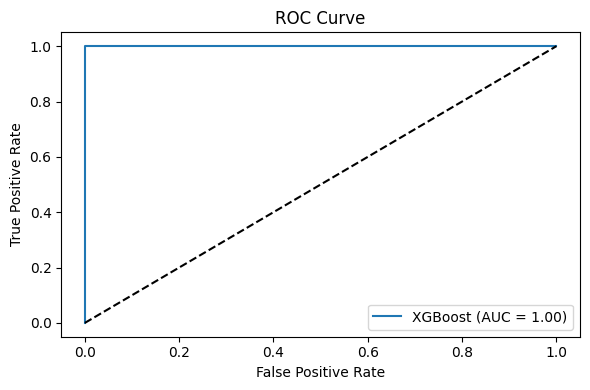

<Figure size 1000x600 with 0 Axes>

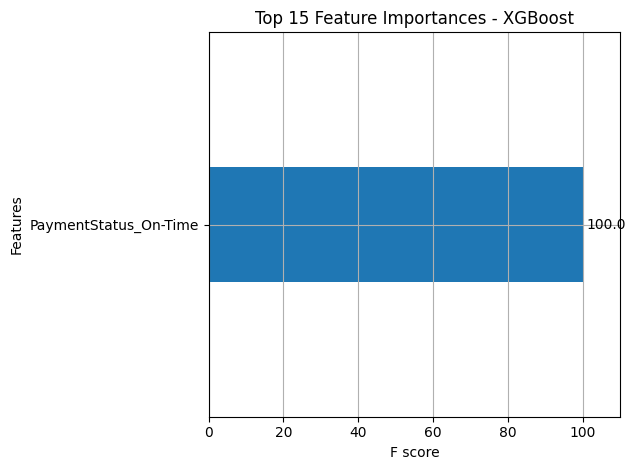

In [ ]:
#XG Boost

# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance

# STEP 2: Load dataset
df = pd.read_csv('Loan_Default_Prediction1.csv')  # Replace with your filename

# STEP 3: Drop ID column (if exists)
if 'LoanID' in df.columns:
    df.drop(['LoanID'], axis=1, inplace=True)

# STEP 4: Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# STEP 5: Convert object columns to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# STEP 6: One-hot encoding
X = df.drop('Default', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Default']

# STEP 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# STEP 8: Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=1,  # You can tune this based on imbalance
    random_state=42
)

xgb_model.fit(X_train, y_train)

# STEP 9: Evaluate model
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🎯 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# STEP 10: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# STEP 11: Feature Importance (Top 15)
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=15, height=0.6)
plt.title("Top 15 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined in previous cells
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# 1. Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# 2. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

y_proba_rf = rf.predict_proba(X_test)[:, 1]

# 3. Train XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

NameError: name 'X' is not defined

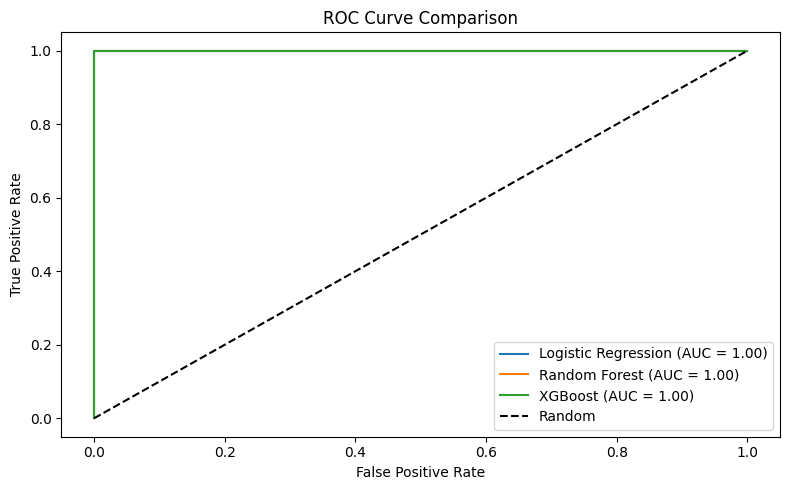

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_logreg):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


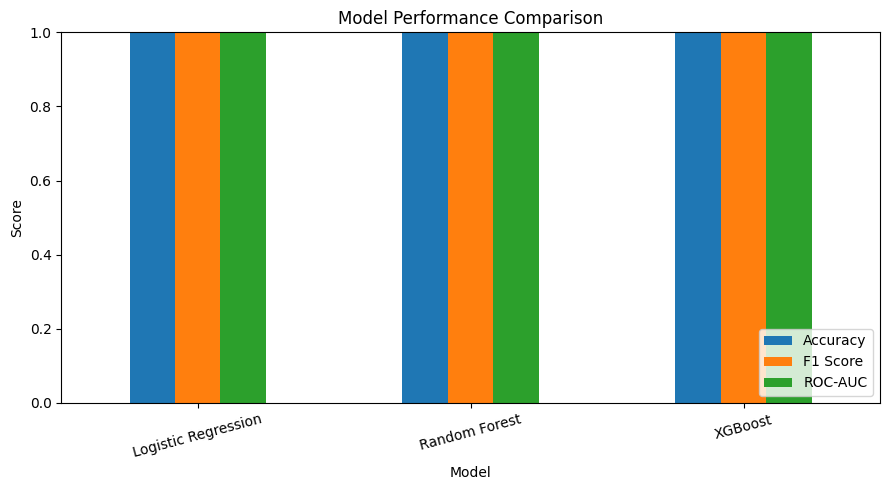

In [ ]:
#Accuracy / F1 / AUC Score Comparison Bar Plot


from sklearn.metrics import accuracy_score, f1_score

# Assuming all models are trained and we have predictions:
# y_pred_logreg, y_pred_rf, y_pred_xgb

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]
f1_scores = [
    f1_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_xgb)
]
roc_aucs = [
    roc_auc_score(y_test, y_proba_logreg),
    roc_auc_score(y_test, y_proba_rf),
    roc_auc_score(y_test, y_proba_xgb)
]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'ROC-AUC': roc_aucs
})

# Plot
comparison_df.set_index('Model').plot(kind='bar', figsize=(9, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
pip install shap

In [ ]:
#TASK ---->5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load your dataset
import pandas as pd
df = pd.read_csv("/content/Loan_Default_Prediction1.csv")

# Drop Loan_ID since it's just an identifier
df.drop(columns=['LoanID'], inplace=True)

# Fill missing values (forward fill is one approach)
df.ffill(inplace=True)

In [ ]:
# Encode categorical columns using Label Encoding for binary and One-Hot for others
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'HasMortgage', 'HasDependents', 'HasCoSigner']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Default'])  # Features
y = df['Default']                 # Target

# One-hot encode remaining categorical columns
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'PaymentStatus', 'Income Level']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop original categorical columns after one-hot encoding
X = X.drop(columns=categorical_cols, errors='ignore')

# Display the dtypes of X to verify
print("Data types of X after one-hot encoding and dropping original columns:")
print(X.dtypes)

Data types of X after one-hot encoding and dropping original columns:
Age                             float64
Income                          float64
LoanAmount                      float64
CreditScore                     float64
MonthsEmployed                  float64
NumCreditLines                  float64
InterestRate                    float64
LoanTerm                        float64
DTIRatio                        float64
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
Gender                            int64
Education_High School              bool
Education_Master's                 bool
Education_PhD                      bool
EmploymentType_Part-time           bool
EmploymentType_Self-employed       bool
EmploymentType_Unemployed          bool
MaritalStatus_Married              bool
MaritalStatus_Single               bool
LoanPurpose_Business               bool
LoanPurpose_Education              bool
LoanPurpos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import xgboost as xgb
import pandas as pd

# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values # Also convert y_train to numpy if it's a pandas Series

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_np, y_train_np)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("/content/Loan_Default_Prediction1.csv")

# Drop Loan_ID since it's just an identifier
df.drop(columns=['LoanID'], inplace=True)

# Fill missing values (forward fill is one approach)
df.ffill(inplace=True)

# Encode categorical columns using Label Encoding for binary and One-Hot for others
label_cols = ['Gender', 'HasMortgage', 'HasDependents', 'HasCoSigner']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features (X) and target (y)
X = df.drop(columns=['Default'])  # Features
y = df['Default']                 # Target

# One-hot encode remaining categorical columns
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'PaymentStatus', 'Income Level']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop original categorical columns after one-hot encoding
X = X.drop(columns=categorical_cols, errors='ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data preprocessing complete and data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data preprocessing complete and data split into training and testing sets.
Shape of X_train: (204277, 28)
Shape of X_test: (51070, 28)
Shape of y_train: (204277,)
Shape of y_test: (51070,)


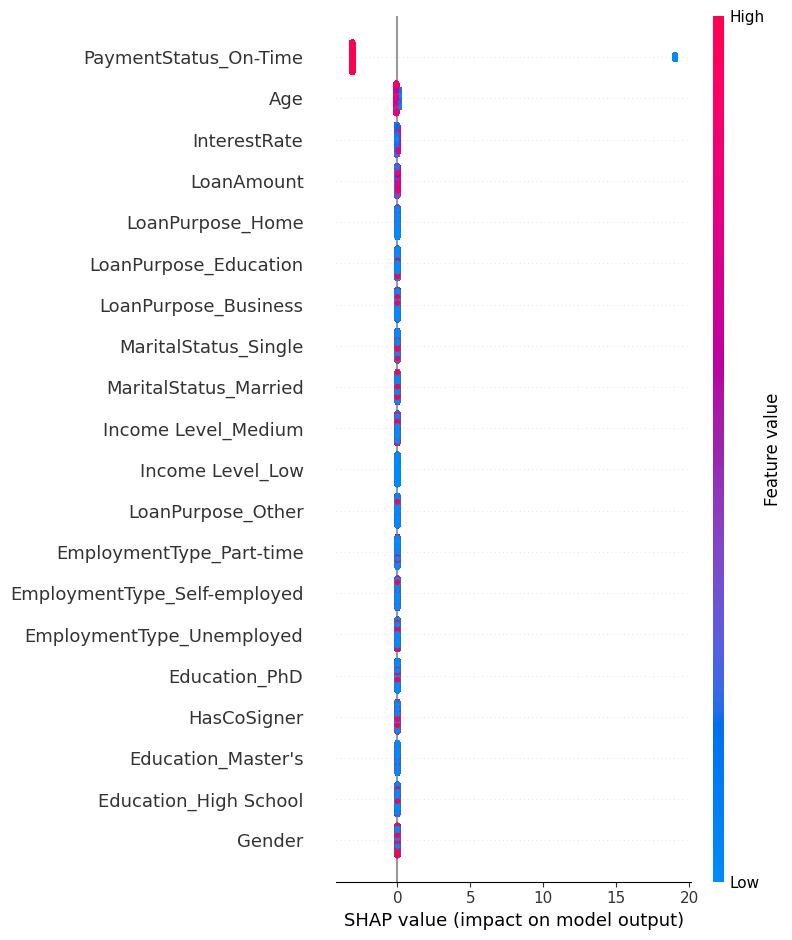

In [ ]:
import shap
import numpy as np

# Convert X_train and X_test DataFrames to NumPy arrays with float dtype
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)

explainer = shap.Explainer(model, X_train_np)
shap_values = explainer(X_test_np)

shap.summary_plot(shap_values, X_test)

In [ ]:
pip install aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

# Create a DataFrame that includes both features (X_test) and the target variable (y_test)
# Ensure y_test is named 'Default' to match the original column name
data_for_aif = X_test.copy()
data_for_aif['Default'] = y_test

# Create BinaryLabelDataset object
# Use the correct label name 'Default'
data = BinaryLabelDataset(df=data_for_aif, label_names=['Default'], protected_attribute_names=['Gender'])

# Get predictions from the trained model on X_test
# The model was trained on NumPy arrays, so we should predict on X_test_np
# However, AIF360 metrics expect the predictions to align with the DataFrame structure used for the dataset
# Let's predict on X_test directly, assuming the model can handle it after previous fixes
# If not, we might need to predict on X_test_np and convert back
y_pred = model.predict(X_test)


data_pred = data.copy()
data_pred.labels = y_pred.reshape(-1, 1) # Reshape predictions to be a column vector

# Compute fairness metrics
# Ensure privileged and unprivileged groups match the encoded 'Gender' values (0 and 1)
# Based on previous LabelEncoding, we need to check which value corresponds to the privileged group (e.g., Male or Female)
# Assuming Gender 1 is privileged (e.g., Male) and Gender 0 is unprivileged (e.g., Female) based on typical datasets
privileged_groups = [{'Gender': 1}]
unprivileged_groups = [{'Gender': 0}]

metric = ClassificationMetric(data, data_pred, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
print("Statistical parity difference:", metric.statistical_parity_difference())
print("Equal opportunity difference:", metric.equal_opportunity_difference())

Statistical parity difference: 0.0046223505378760466
Equal opportunity difference: 0.0


In [ ]:
print("Equal opportunity difference:", metric.equal_opportunity_difference())


Equal opportunity difference: 0.0


In [ ]:
#TASK ---->6
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Convert to score out of 100
risk_scores = (y_proba * 100).round(2)

# Attach to test data
results = X_test.copy()
results["Actual_Default"] = y_test
results["Predicted_Probability"] = y_proba
results["Risk_Score"] = risk_scores


In [ ]:
results["Actual_Default"] = y_test
results["Predicted_Probability"] = y_proba
results["Risk_Score"] = risk_scores

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# You can plot fpr vs tpr to visualize optimal trade-off
# Or find threshold closest to top-left of ROC
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Best threshold based on ROC:", optimal_threshold)


Best threshold based on ROC: 0.9999497


In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve

#Predict probabilities of default (class 1)
y_proba = model.predict_proba(X_test)[:, 1]

#Convert to Risk Score (0–100)
risk_scores = (y_proba * 100).round(2)

#Prepare results DataFrame
results = pd.DataFrame(X_test).copy()
results["Actual_Default"] = y_test
results["Predicted_Probability"] = y_proba
results["Risk_Score"] = risk_scores

#Get optimal threshold from ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Best threshold based on ROC:", round(optimal_threshold, 4))

#Safe quantile binning (handles duplicate bin edges)
try:
    results["Risk_Band_Quantile"] = pd.qcut(
        results["Risk_Score"],
        q=5,
        labels=["Very Low", "Low", "Medium", "High", "Very High"],
        duplicates='drop'
    )
except ValueError as e:
    print("qcut failed:", e)
    results["Risk_Band_Quantile"] = "Unassigned"

#Fixed-width binning (works even with many 0s)
results["Risk_Band_Fixed"] = pd.cut(
    results["Risk_Score"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"],
    include_lowest=True
)

#Show stats for both binning methods

print("\n Quantile-based Risk Band Counts:")
print(results["Risk_Band_Quantile"].value_counts(dropna=False))

print("\n Default Rate by Quantile-based Band:")
print(results.groupby("Risk_Band_Quantile", observed=False)["Actual_Default"].mean())

print("\n Fixed-width Risk Band Counts:")
print(results["Risk_Band_Fixed"].value_counts(dropna=False))

print("\n Default Rate by Fixed-width Band:")
print(results.groupby("Risk_Band_Fixed", observed=False)["Actual_Default"].mean())


Best threshold based on ROC: 0.09
qcut failed: Bin labels must be one fewer than the number of bin edges

 Quantile-based Risk Band Counts:
Risk_Band_Quantile
Unassigned    6000
Name: count, dtype: int64

 Default Rate by Quantile-based Band:
Risk_Band_Quantile
Unassigned    0.054833
Name: Actual_Default, dtype: float64

 Fixed-width Risk Band Counts:
Risk_Band_Fixed
Very Low     5721
Very High     198
Low            43
High           22
Medium         16
Name: count, dtype: int64

 Default Rate by Fixed-width Band:
Risk_Band_Fixed
Very Low     0.015732
Low          0.232558
Medium       0.875000
High         0.818182
Very High    0.994949
Name: Actual_Default, dtype: float64


In [ ]:
#TASK ---->7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
results["Risk_Band"] = pd.qcut(
results["Risk_Score"],
q=5,
labels=["Very Low", "Low", "Medium", "High", "Very High"]
)



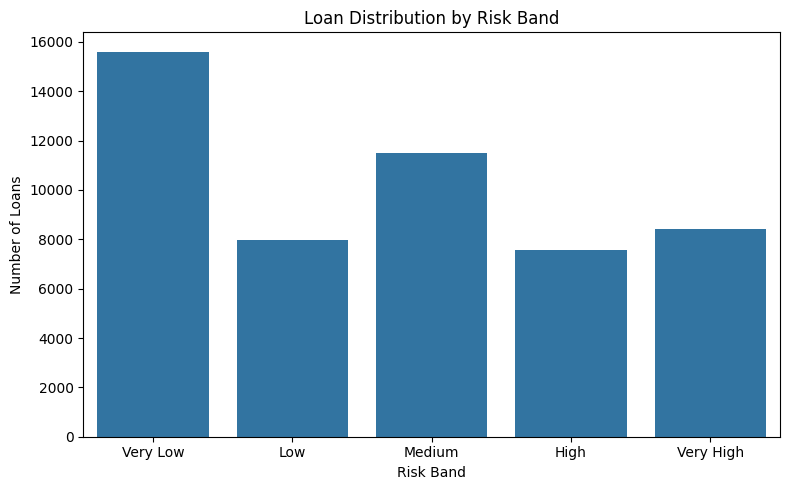

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Risk_Band", data=results, order=["Very Low", "Low", "Medium", "High", "Very High"])
plt.title("Loan Distribution by Risk Band")
plt.xlabel("Risk Band")
plt.ylabel("Number of Loans")
plt.tight_layout()
plt.savefig("risk_band_distribution.png")
plt.show()

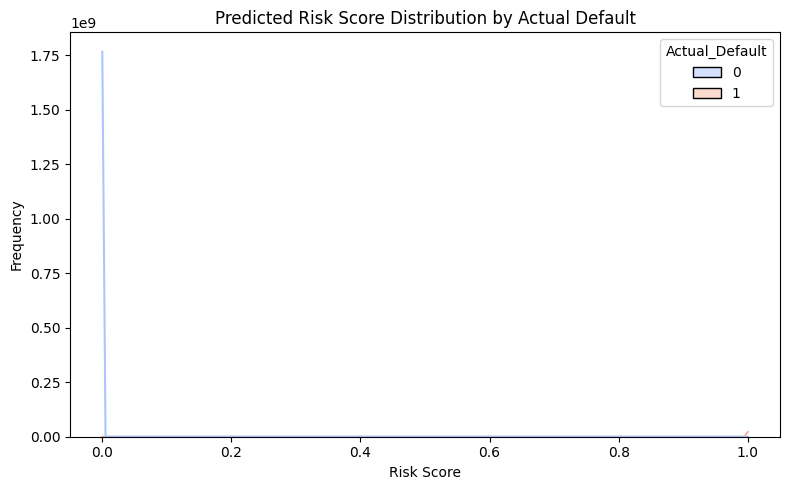

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=results, x="Risk_Score", hue="Actual_Default", bins=30, kde=True, palette="coolwarm")
plt.title("Predicted Risk Score Distribution by Actual Default")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("risk_score_vs_default.png")
plt.show()

/tmp/ipython-input-80-348120228.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(results_with_education, values="Actual_Default", index="Education", columns="Risk_Band", aggfunc="mean")


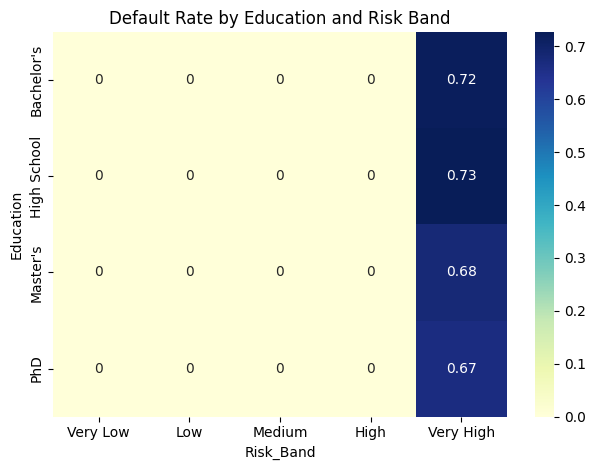

In [ ]:
# Merge the original 'Education' column from the full dataset based on index
results_with_education = results.merge(df[['Education']], left_index=True, right_index=True, how='left')

# merged DataFrame for the pivot table
pivot = pd.pivot_table(results_with_education, values="Actual_Default", index="Education", columns="Risk_Band", aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Default Rate by Education and Risk Band")
plt.tight_layout()
plt.savefig("heatmap_education_riskband.png")
plt.show()

In [ ]:
results.to_csv("loan_risk_report.csv", index=False)
results.to_excel("loan_risk_report.xlsx", index=False)

In [ ]:
default_rate = results.groupby("Risk_Band")["Actual_Default"].mean()
print("\nDefault rate per Risk Band:")
print(default_rate)


Default rate per Risk Band:
Risk_Band
Very Low     0.000000
Low          0.000000
Medium       0.000000
High         0.000000
Very High    0.699549
Name: Actual_Default, dtype: float64
